## TODO

- compare different families
    - by how much splicing difference across development
    - metric to compare pie charts
        - for the highest expressed isoform, what proportion does it compose, filter for > 1 TPM at gene level, take the IQR?
- make better plots
- identify examples?
- take a look by hand at the isoforms that don't show up in GTEx or dev-tissue
    - could it be a short read mapping problem
- look at the ORFcaptureseq long read data

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys

# import utils
sys.path.append("../")

from data_loading import (load_valid_isoform_clones,
                          load_annotated_6k_collection,
                          load_developmental_tissue_expression)

pd.set_option('display.max_columns', 100)

ImportError: cannot import name 'load_developmental_tissue_expression'

In [2]:
df, metadata, genes = load_developmental_tissue_expression()

100%|██████████| 2748/2748 [00:13<00:00, 198.59it/s]


In [3]:
rename_dev_stage = {'8 week post conception,embryo': '08',
'11 week post conception,late embryo': '11',
'embryo,7 week post conception': '07',
'infant': 'infant',
'10 week post conception,late embryo': '10',
'young adult': 'young adult',
'13 week post conception,late embryo': '13',
'16 week post conception,late embryo': '16',
'4 week post conception,embryo': '04',
'neonate': 'neonate',
'19 week post conception,late embryo': '19',
'9 week post conception,late embryo': '09',
'adolescent': 'adolescent',
'5 week post conception,embryo': '05',
'embryo,6 week post conception': '06',
'12 week post conception,late embryo': '12',
'18 week post conception,late embryo': '18',
'toddler': 'toddler',
'elderly': 'elderly',
'middle adult': 'adult',
'school age child': 'child'}
metadata['dev_stage'] = metadata['Developmental_Stage'].map(rename_dev_stage)
means = (df.groupby(df.columns.map(metadata['organism_part'] + ' ' + metadata['dev_stage']), axis=1)
           .mean())

In [7]:
means = (df.groupby([df.columns.map(metadata['organism_part']), df.columns.map(metadata['dev_stage'])], axis=1)
           .mean())

forebrain                                          \
                                 04        05        07        08        09   
UID                                                                           
AEBP2|2/3|05F03 nomatch    1.872479  1.489570  1.081661  0.639046  0.076421   
AEBP2|3/3|05E07 nomatch    0.399767  0.197733  1.576717  0.216178  0.000000   
ARNT2|1/6|08C12 ARNT2-201  4.862705  4.959455  6.119775  6.023900  4.897307   
ARNT2|2/6|09E01 nomatch    0.885055  0.359665  1.515370  0.399531  0.000000   
ARNT2|3/6|10D11 ARNT2-209  0.000000  0.000000  0.000000  0.000000  1.649287   

                                                                       \
                                 10            11        12        13   
UID                                                                     
AEBP2|2/3|05F03 nomatch    0.871337  8.166145e-01  1.339291  1.596135   
AEBP2|3/3|05E07 nomatch    0.000000  0.000000e+00  0.000000  0.109571   
ARNT2|1/6|08C12 ARNT2-201  5.358537  5.384520e+00  5.985953  5.979885   
ARNT2|2/6|09E01 nomatch    0.160124  1.690750e-01  0.919758  0.545664   
ARNT2|3/6|10D11 ARNT2-209  0.000000  1.101533e-10  0.464061  0.000000   

                                                                              \
                                 16        18        19 adolescent     adult   
UID                                                                            
AEBP2|2/3|05F03 nomatch    1.671030  1.588493  0.829196   0.040674  0.000000   
AEBP2|3/3|05E07 nomatch    0.251855  0.000000  0.660860   0.073298  0.000000   
ARNT2|1/6|08C12 ARNT2-201  5.624947  5.755841  5.869416   5.580541  6.527530   
ARNT2|2/6|09E01 nomatch    0.131184  0.113814  0.531703   0.086630  0.261993   
ARNT2|3/6|10D11 ARNT2-209  0.000000  0.000000  0.122630   2.239036  1.284908   

                                                                             \
                              child   elderly    infant   neonate   toddler   
UID                                                                           
AEBP2|2/3|05F03 nomatch    0.229478  0.137670  0.878068  0.627044  0.737073   
AEBP2|3/3|05E07 nomatch    0.000000  0.000000  0.000000  0.000000  0.371951   
ARNT2|1/6|08C12 ARNT2-201  5.100402  6.118422  5.369389  5.783673  5.370352   
ARNT2|2/6|09E01 nomatch    0.137458  0.042842  0.053753  0.186321  0.000000   
ARNT2|3/6|10D11 ARNT2-209  2.278218  3.424184  1.953960  0.953081  1.840925   

                                          heart                                \
                          young adult        04        05        06        07   
UID                                                                             
AEBP2|2/3|05F03 nomatch      0.692749  2.926974  1.382288  1.142214  0.893219   
AEBP2|3/3|05E07 nomatch      0.106877  0.166645  0.147724  0.411744  0.724633   
ARNT2|1/6|08C12 ARNT2-201    6.683972  2.912478  3.256113  2.885619  2.914371   
ARNT2|2/6|09E01 nomatch      0.071201  0.308656  0.163984  0.000000  0.000000   
ARNT2|3/6|10D11 ARNT2-209    0.583689  0.000000  0.080982  0.000000  0.721437   

                                                                             \
                                 08        09        10        11        12   
UID                                                                           
AEBP2|2/3|05F03 nomatch    0.455306  0.136616  0.875627  0.667704  0.868266   
AEBP2|3/3|05E07 nomatch    0.020903  0.042454  0.080490  0.109940  0.000000   
ARNT2|1/6|08C12 ARNT2-201  2.451246  2.201179  2.423742  2.992116  2.211030   
ARNT2|2/6|09E01 nomatch    0.015930  0.000000  0.000000  0.025862  0.136424   
ARNT2|3/6|10D11 ARNT2-209  0.701284  1.176511  0.070959  0.000000  0.127647   

                                                                              \
                                 13        16        18        19 adolescent   
UID                                                                            
AEBP2|2/3|05

In [165]:
rfx4['dev_stage'].unique()

array(['young adult', 'infant', 'adolescent', '10', 'child', '09', '16',
       '06', '08', '07', '04', '11', '19', '05', 'adult', 'neonate', '13',
       '12', 'elderly', 'toddler', '18'], dtype=object)

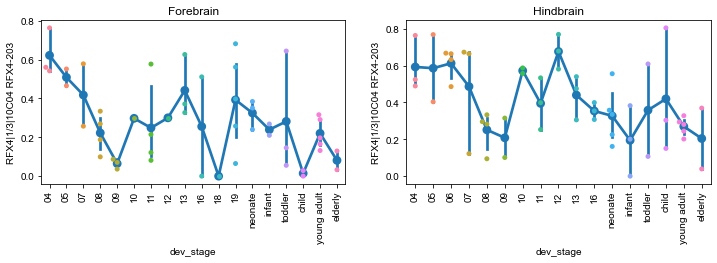

In [172]:
# RFX4 example


dev_order = ['04', 
             '05',
             '06',
             '07',
             '08', 
             '09', 
             '10', 
             '11',
             '12',
             '13',
             '16',
             '18',
             '19',
       'neonate',
       'infant', 
       'toddler',
       'child',
       'young adult', 
       'adolescent'
       'adult',
       'elderly',
       ]

rfx4 = df.loc[df.index.str.startswith('RFX4|')].T.copy()
rfx4 = (2 ** rfx4 - 1)
for column in rfx4.columns:
    rfx4[column] = rfx4[column] / rfx4.sum(axis=1)
rfx4['tissue'] = rfx4.index.map(metadata['organism_part'])
rfx4['dev_stage'] = rfx4.index.map(metadata['dev_stage'])
rfx4 = rfx4.loc[rfx4['tissue'].isin(['hindbrain', 'forebrain']), :]
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(h=3, w=12)

axs[0].set_title('Forebrain')
sns.swarmplot(data=rfx4.loc[rfx4['tissue'] == 'forebrain', :],
              y='RFX4|1/3|10C04 RFX4-203',
              x='dev_stage',
              order=[x for x in dev_order if x in rfx4.loc[rfx4['tissue'] == 'forebrain', 'dev_stage'].unique()],
              ax=axs[0])
sns.pointplot(data=rfx4.loc[rfx4['tissue'] == 'forebrain', :],
              y='RFX4|1/3|10C04 RFX4-203',
              x='dev_stage',
              order=[x for x in dev_order if x in rfx4.loc[rfx4['tissue'] == 'forebrain', 'dev_stage'].unique()],
              ax=axs[0])
axs[1].set_title('Hindbrain')
sns.swarmplot(data=rfx4.loc[rfx4['tissue'] == 'hindbrain', :],
              y='RFX4|1/3|10C04 RFX4-203',
              x='dev_stage',
              order=[x for x in dev_order if x in rfx4.loc[rfx4['tissue'] == 'hindbrain', 'dev_stage'].unique()],
              ax=axs[1])
sns.pointplot(data=rfx4.loc[rfx4['tissue'] == 'hindbrain', :],
              y='RFX4|1/3|10C04 RFX4-203',
              x='dev_stage',
              order=[x for x in dev_order if x in rfx4.loc[rfx4['tissue'] == 'hindbrain', 'dev_stage'].unique()],
              ax=axs[1])
for ax in axs:
    ax.xaxis.set_ticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('../figures/RFX4_brain_dev_isoform_fraction.pdf',
            bbox_inches='tight')

In [128]:
from scipy import stats
# take the max IQR per tissue
most_expressed_isoform_per_gene = means.mean(axis=1).groupby(genes).idxmax()
raw_means = (2 ** means - 1)
f = raw_means / raw_means.groupby(genes).transform('sum')
f = f.loc[f.index.isin(most_expressed_isoform_per_gene.values), :]
f.index = f.index.map({v: k for k, v in most_expressed_isoform_per_gene.iteritems()})
f = f * (means.groupby(genes).sum() >= 1).applymap(lambda x: 1 if x else np.nan)
iqr = (f.T.reset_index().groupby('level_0')
.agg(lambda x: stats.iqr(x, nan_policy='omit'))
.T)#.loc['forebrain', :])  # TEST
#.max())

/Users/lukelambourne/work/tf_isoforms/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


In [95]:
iqr.sort_values(ascending=False).head()

ZNF438    0.513736
ZNF34     0.467521
ETV7      0.451237
GRHL3     0.430192
ZNF232    0.416828
Name: forebrain, dtype: float64

In [129]:
# groupby tf family and plot
from data_loading import load_tf_families
tf_fam = load_tf_families()
#iqr = iqr.to_frame(name='iqr_isoform_ratio')
iqr['family'] = iqr.index.map(tf_fam)

In [79]:
big_families = iqr['family'].value_counts()[iqr['family'].value_counts() >= 5].index.values

Index(['forebrain', 'heart', 'hindbrain', 'kidney', 'liver', 'ovary',
       'testis'],
      dtype='object', name='level_0')

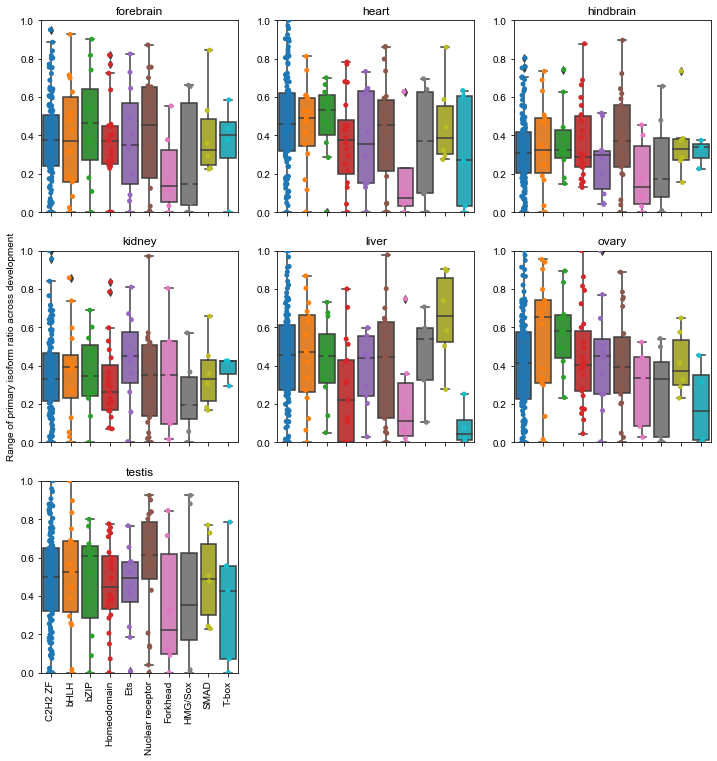

In [131]:
import seaborn as sns

tissues = iqr.columns[:-1]
fig, axs = plt.subplots(3, 3, sharex=True)
fig.set_size_inches(12, 12)
for tissue, ax in zip(tissues, axs.flatten()):
    sns.stripplot(data=iqr.loc[iqr['family'].isin(big_families)],
                x='family',
                y=tissue,
                ax=ax)
    sns.boxplot(data=iqr.loc[iqr['family'].isin(big_families)],
                x='family',
                y=tissue,
                ax=ax)
    ax.set_title(tissue)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 0.75)

axs[-1, 0].xaxis.set_ticklabels(ax.get_xticklabels(), rotation=90)
axs[1, 0].set_ylabel('IQR of primary isoform ratio across development')
axs[2, 1].axis('off')
axs[2, 2].axis('off')
plt.savefig('../figures/IQR-isoform-ratio_across-development_by-tissue.pdf',
            bbox_inches='tight')

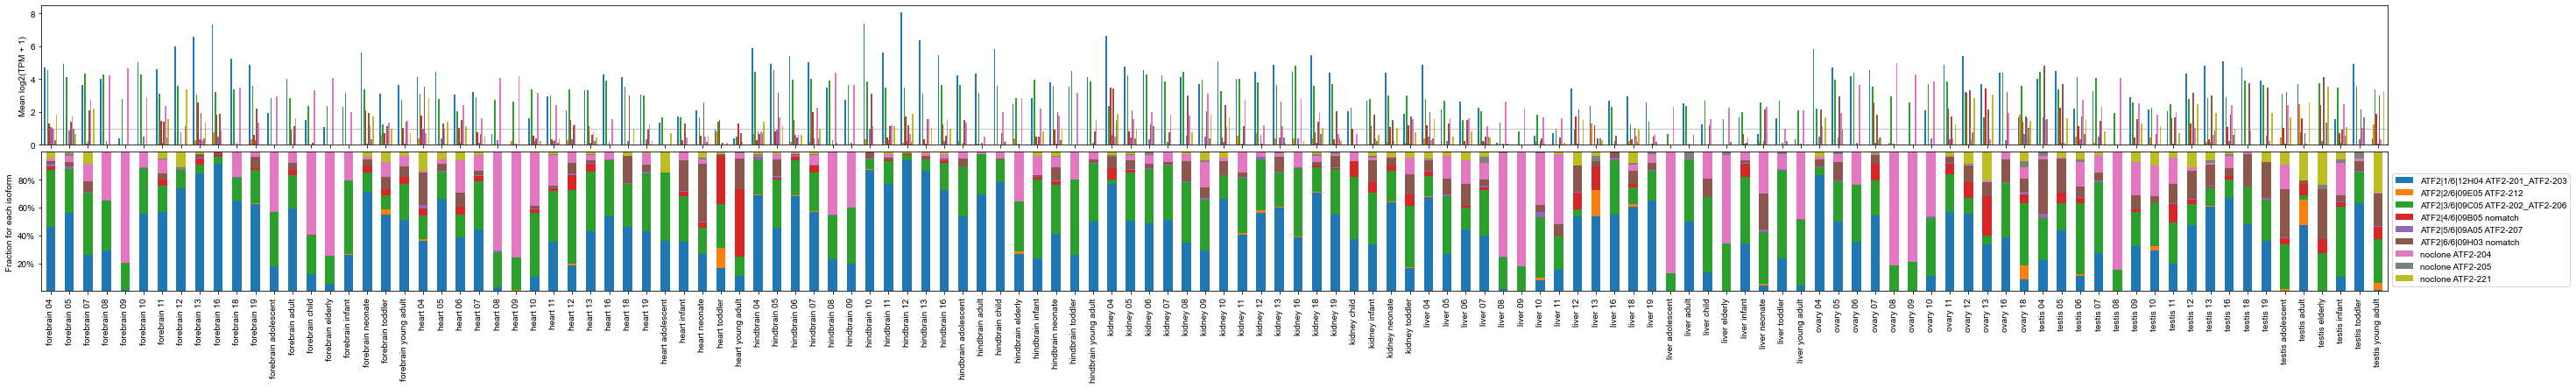

In [5]:
def developmental_tissue_expression_plot(gene_name, means=means):
    fig, axes = plt.subplots(2, 1, sharex=True)
    fig.set_size_inches(48, 6)
    ### bar chart ###
    (means.loc[genes == gene_name, :]
          .T
          .plot.bar(ax=axes[0],
                    legend=False,
                    width=0.7))
    ### percentages ###
    raw_means = 2 ** means.loc[genes == gene_name] - 1.
    (raw_means.div(raw_means.sum(axis=0))
              .T.plot.bar(ax=axes[1], 
                          stacked=True,
                          legend=False))
    axes[0].set_ylabel('Mean log2(TPM + 1)')
    axes[1].set_ylabel('Fraction for each isoform')
    axes[1].set_yticklabels(['{:.0%}'.format(t) for t in axes[1].get_yticks()])
    axes[1].legend(loc='lower left', bbox_to_anchor=(1, 0))
    axes[0].axhline(y=1, color='grey', linewidth=0.5)
    plt.subplots_adjust(hspace=0.05)
    fig_dir = Path('/Users/lukelambourne/Dropbox (Partners HealthCare)/TF_isoforms/TF_gene_summary_pages/media')
    plt.savefig(fig_dir / (gene_name + '_developmental-tissue-expression.svg'),
                bbox_inches='tight')

#1 try and make wider
#2 try interactive...  
developmental_tissue_expression_plot('ATF2')

In [17]:
import altair as alt
import hvplot.pandas


def interactive_developmental_tissue_expression_plot(gene_name, means=means):
    """
    
    work in progress.... 
    - choose a backend: altair, plotly, bokeh/holoviews
    
    """
    #fig, axes = plt.subplots(2, 1, sharex=True)
    #fig.set_size_inches(48, 6)
    ### bar chart ###
    fig = (means.loc[genes == gene_name, :]
          .T
          .plot.bar(backend='plotly',
                    barmode='group',
                    width=3000,
                    height=500,
                    labels={'index': '', 'value': 'Mean log2(TPM + 1)'}))
    fig.update_layout(plot_bgcolor='white')
    fig.add_hline(y=1, line_width=0.5, line_color='grey')
    # save
    ### percentages ###
    """
    raw_means = 2 ** means.loc[genes == gene_name] - 1.
    (raw_means.div(raw_means.sum(axis=0))
              .T.plot.bar(ax=axes[1], 
                          stacked=True,
                          legend=False))
    axes[1].set_ylabel('Fraction for each isoform')
    axes[1].set_yticklabels(['{:.0%}'.format(t) for t in axes[1].get_yticks()])
    """
    fig_dir = Path('/Users/lukelambourne/Dropbox (Partners HealthCare)/TF_isoforms/TF_gene_summary_pages/media')
    #plt.savefig(fig_dir / (gene_name + '_developmental-tissue-expression.svg'),
    #            bbox_inches='tight')
    fig.write_html(fig_dir / (gene_name + '_developmental-tissue-expression_interactive.html'))
    return fig


interactive_developmental_tissue_expression_plot('ATF2')

In [34]:
# NOTE: will take a long time
for tf in genes.unique():
    developmental_tissue_expression_plot(tf)
    plt.close(plt.gcf())

In [4]:
# check isoform IDs relative to GTEx

from data_loading import load_gtex_remapped

gtex, metadata_gtex, genes_gtex = load_gtex_remapped()

100%|██████████| 2748/2748 [00:12<00:00, 217.95it/s]


In [5]:
mean_gtex = gtex.groupby(gtex.columns.map(metadata_gtex['body_site']), axis=1).mean()

In [134]:
print('{:.0%} isoforms ≥ 1 TPM in any GTEx tissue'.format(
    (mean_gtex >= 1).any(axis=1).sum() / mean_gtex.shape[0]))
print('{:.0%} isoforms ≥ 1 TPM in any developmental tissue'.format(
    (means >= 1).any(axis=1).sum() / means.shape[0]))

print('{:.0%} cloned isoforms ≥ 1 TPM in any GTEx tissue'.format(
    (mean_gtex.loc[~mean_gtex.index.str.startswith('noclone'), :] >= 1).any(axis=1).sum() / 
    (~mean_gtex.index.str.startswith('noclone')).sum()))
print('{:.0%} cloned isoforms ≥ 1 TPM in any developmental tissue'.format(
    (means.loc[~means.index.str.startswith('noclone'), :] >= 1).any(axis=1).sum() / 
    (~means.index.str.startswith('noclone')).sum()))

print('{:.0%} novel isoforms ≥ 1 TPM in any GTEx tissue'.format(
    (mean_gtex.loc[mean_gtex.index.str.endswith('nomatch'), :] >= 1).any(axis=1).sum() / 
    (mean_gtex.index.str.endswith('nomatch')).sum()))
print('{:.0%} novel isoforms ≥ 1 TPM in any developmental tissue'.format(
    (means.loc[means.index.str.endswith('nomatch'), :] >= 1).any(axis=1).sum() / 
    (means.index.str.endswith('nomatch')).sum()))

71% isoforms ≥ 1 TPM in any GTEx tissue
85% isoforms ≥ 1 TPM in any developmental tissue
75% cloned isoforms ≥ 1 TPM in any GTEx tissue
88% cloned isoforms ≥ 1 TPM in any developmental tissue
44% novel isoforms ≥ 1 TPM in any GTEx tissue
75% novel isoforms ≥ 1 TPM in any developmental tissue


In [135]:
(~means.index.str.startswith('noclone')).sum()

756

In [31]:
means.index.str.endswith('nomatch').sum()

191

In [136]:
not_in_gtex = set(mean_gtex.loc[(~mean_gtex.index.str.startswith('noclone')) & (mean_gtex < 1).all(axis=1), :].index.values)
in_dev = set(means.loc[(~means.index.str.startswith('noclone')) & (means >= 1).any(axis=1), :].index.values)
print(len(not_in_gtex))
print(len(in_dev.intersection(not_in_gtex)))

189
120


In [137]:
not_in_gtex.difference(in_dev)

{'CREB5|1/3|08E11 CREB5-204',
 'DLX4|3/3|10B05 DLX4-206',
 'DMTF1|2/5|05H01 DMTF1-213',
 'E4F1|2/2|12A09 E4F1-204',
 'FLI1|2/4|04B12 FLI1-207',
 'FLI1|4/4|05E02 FLI1-202',
 'FOXP2|4/10|12A06 FOXP2-205',
 'FOXP2|6/10|06F12 nomatch',
 'FOXP2|7/10|06G10 nomatch',
 'FOXP3|1/6|04E05 nomatch',
 'FOXP3|4/6|04G05 nomatch',
 'FOXP3|6/6|04H04 FOXP3-202',
 'GRHL3|2/7|08A10 GRHL3-201',
 'GRHL3|6/7|08G10 nomatch',
 'HNF4A|3/6|10C08 HNF4A-206',
 'HSFY1|2/2|11F06 nomatch',
 'IKZF2|2/4|12C01 IKZF2-202',
 'IKZF2|3/4|02C06 nomatch',
 'IKZF2|4/4|02F05 IKZF2-209',
 'IRF5|2/5|07D05 nomatch',
 'IRF9|5/6|04H03 nomatch',
 'LCOR|2/2|12B05 LCOR-209',
 'MEIS2|2/4|12A07 MEIS2-202',
 'MEIS3|1/5|07C11 nomatch',
 'MITF|2/4|12H11 MITF-201',
 'MXD3|4/4|06C08 nomatch',
 'NFIA|3/5|02E09 NFIA-208',
 'NFYA|2/3|07G01 nomatch',
 'NR4A2|2/3|06H07 nomatch',
 'NR5A2|4/5|01F10 nomatch',
 'NR5A2|5/5|02C01 nomatch',
 'PAX4|1/2|03B08 nomatch',
 'PAX4|2/2|11F07 PAX4-207',
 'PAX7|3/4|03D09 nomatch',
 'PPARG|3/4|01H02 nomatch',
 'PRD

In [24]:
in_dev.intersection(not_in_gtex)

{'AEBP2|2/3|05F03 nomatch',
 'AEBP2|3/3|05E07 nomatch',
 'ARNT2|1/6|08C12 ARNT2-201',
 'ARNT2|2/6|09E01 nomatch',
 'ARNT2|3/6|10D11 ARNT2-209',
 'ARNTL2|1/5|10H01 nomatch',
 'ARNTL2|3/5|10B01 nomatch',
 'ARNTL|1/2|08H08 ARNTL-201',
 'ATF2|2/6|09E05 ATF2-212',
 'ATF2|4/6|09B05 nomatch',
 'ATF2|5/6|09A05 ATF2-207',
 'ATF3|2/2|08D04 ATF3-204',
 'CREB3L3|1/2|07C03 CREB3L3-202',
 'DLX1|2/2|07E09 DLX1-201',
 'DLX4|2/3|10A03 DLX4-202',
 'DLX5|2/2|06H01 nomatch',
 'E2F3|3/4|10B08 nomatch',
 'E2F3|4/4|10G08 nomatch',
 'E2F8|2/4|03A06 nomatch',
 'EBF2|2/2|04B11 EBF2-201',
 'EGR2|2/2|01G09 EGR2-202',
 'ELF2|1/4|03A11 nomatch',
 'ELF2|2/4|04E01 ELF2-201',
 'ERF|2/2|05G11 ERF-202',
 'ESRRG|1/2|09B10 nomatch',
 'ESRRG|2/2|09C10 nomatch',
 'ETV2|4/4|12F10 ETV2-201',
 'ETV4|1/2|12D06 ETV4-208',
 'ETV7|2/2|07F02 ETV7-204',
 'FEZF1|2/2|08E07 FEZF1-202',
 'FOSB|3/3|05G04 FOSB-212',
 'FOS|2/4|03E05 FOS-206',
 'FOXO3|2/2|08E03 FOXO3-203',
 'FOXP2|1/10|07C01 FOXP2-211',
 'FOXP2|2/10|07B01 FOXP2-201_FOXP2-20

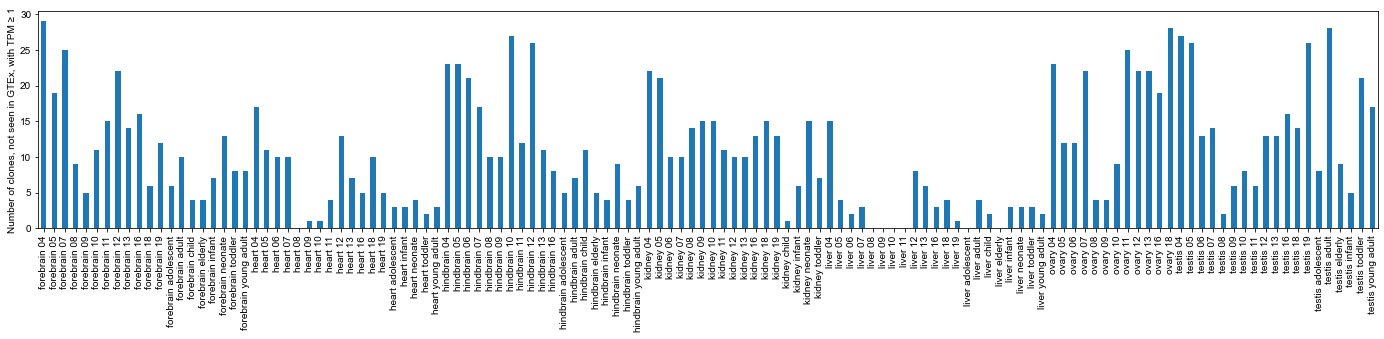

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=24, h=4)
((means.loc[means.index.isin(not_in_gtex) & ~means.index.str.startswith('noclone'), :] >= 1)
.sum()
.plot.bar(ax=ax))
ax.set_ylabel('Number of clones, not seen in GTEx, with TPM ≥ 1')
plt.savefig('../figures/n-clones_not-in-GTEx_in-dev_by-tissue-and-dev-stage.pdf',
            bbox_inches='tight')

In [20]:
# get the biggest effect (amount of expression and fraction of isoform)
means.loc[means.index.isin(not_in_gtex) & ~means.index.str.startswith('noclone'), :].idxmax().unique()

array(['OTX2|3/3|03C02 OTX2-203_OTX2-204',
       'NEUROG1|1/2|11C05 NEUROG1-201', 'DLX1|2/2|07E09 DLX1-201',
       'KLF7|8/8|10D09 nomatch', 'MEIS3|3/5|07D10 nomatch',
       'ZNF131|4/5|02B06 nomatch', 'KLF7|7/8|10H08 nomatch',
       'ARNT2|3/6|10D11 ARNT2-209', 'KLF12|1/4|09B08 nomatch',
       'ESRRG|1/2|09B10 nomatch', 'ZFP1|3/4|03B11 nomatch',
       'ZBTB1|2/2|05C09 nomatch', 'ZNF3|1/2|11H10 nomatch',
       'E2F3|4/4|10G08 nomatch', 'ZNF302|4/5|06G08 ZNF302-209',
       'ZNF148|2/2|09H01 nomatch', 'PAX7|2/4|03C09 PAX7-203',
       'PAX8|1/5|07H05 nomatch', 'GMEB1|2/2|02A08 nomatch',
       'NR5A2|2/5|11C12 NR5A2-201', 'ETV2|4/4|12F10 ETV2-201',
       'CREM|1/3|09D12 CREM-204', 'KLF7|6/8|01D06 KLF7-209',
       'LHX9|3/3|07A01 LHX9-203', 'HOXA1|2/2|04F05 HOXA1-202',
       'LHX9|2/3|06D10 nomatch', 'ZNF85|2/2|01B03 ZNF85-206',
       'PAX8|4/5|07H07 nomatch', 'PKNOX1|4/4|06G03 nomatch',
       'ZBTB44|6/9|12H02 nomatch', 'FOSB|2/3|05E04 FOSB-211'],
      dtype=object)

## Examples

- MAZ - weird that the two cloned isoforms are not there in GTEx but are there in all samples in this data
- ATF3 - no particular pattern, seems weird again
- NFIA - also weird, high everywhere, not there in GTEx
- FOS - also weird
- FOSB - only in toddler testis
- ZBTB18 - good example of weird, two isoforms with only one showing up in GTEx
- ARNT2 - totally crazy
- ZNF207 - interesting but more tissue specific splicing than development specific

In [21]:
# look for big change in percent of isoform + high overall expression levels
raw_means = 2 ** means - 1.
pct = (raw_means / raw_means.groupby(genes).transform('sum')) * 100
pct.head()

,forebrain 04,forebrain 05,forebrain 07,forebrain 08,forebrain 09,forebrain 10,forebrain 11,forebrain 12,forebrain 13,forebrain 16,forebrain 18,forebrain 19,forebrain adolescent,forebrain adult,forebrain child,forebrain elderly,forebrain infant,forebrain neonate,forebrain toddler,forebrain young adult,heart 04,heart 05,heart 06,heart 07,heart 08,heart 09,heart 10,heart 11,heart 12,heart 13,heart 16,heart 18,heart 19,heart adolescent,heart infant,heart neonate,heart toddler,heart young adult,hindbrain 04,hindbrain 05,hindbrain 06,hindbrain 07,hindbrain 08,hindbrain 09,hindbrain 10,hindbrain 11,hindbrain 12,hindbrain 13,hindbrain 16,hindbrain adolescent,...,liver 06,liver 07,liver 08,liver 09,liver 10,liver 11,liver 12,liver 13,liver 16,liver 18,liver 19,liver adolescent,liver adult,liver child,liver elderly,liver infant,liver neonate,liver toddler,liver young adult,ovary 04,ovary 05,ovary 06,ovary 07,ovary 08,ovary 09,ovary 10,ovary 11,ovary 12,ovary 13,ovary 16,ovary 18,testis 04,testis 05,testis 06,testis 07,testis 08,testis 09,testis 10,testis 11,testis 12,testis 13,testis 16,testis 18,testis 19,testis adolescent,testis adult,testis elderly,testis infant,testis toddler,testis young adult
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AEBP2|2/3|05F03 nomatch,8.955428,5.279700,4.289564,2.901106,0.439800,3.743192,6.001209e+00,5.178928,11.466136,13.312752,17.402812,5.733969,0.406293,0.000000,2.834138,1.554355,9.478450,6.427123,13.208827,6.064109,27.825893,7.226319,8.474547,4.725115,2.521596,0.673682,6.046790,3.276176,7.903993,5.669749,0.530827,0.000000,3.763522,20.242786,0.000000,2.063162e+00,13.574924,0.000000,10.851784,6.164741,8.224325,4.090155,2.595512,0.000000,24.486764,4.856896,5.787754,9.219463,4.474753,0.409225,...,9.964960,1.950866,1.757734,0.716169,0.000843,0.000000,0.0,0.000000e+00,15.552748,0.000000,1.437331,5.275182,0.000000,0.000000,0.000000,0.000000,5.981393,0.000000,0.000000,8.775794e+00,6.185830,8.529152,9.237875,0.283274,0.823405,5.337511,0.000000,9.133536,10.892064,9.245317,2.658193,2.235829e+01,14.676682,3.221152e+00,4.210326,1.559885,2.087616,3.230104,0.000000,0.000000,2.064008,1.117558,4.141163,22.014329,1.917148,18.013990,0.000000,5.013082,2.366820,4.457109
AEBP2|3/3|05E07 nomatch,1.074319,0.428948,7.618461,0.841504,0.000000,0.000000,0.000000e+00,0.000000,0.447167,1.162431,0.000000,4.289430,0.740559,0.000000,0.000000,0.000000,0.000000,0.000000,5.826016,0.756535,0.515832,0.484900,2.318665,3.596161,0.099172,0.202559,0.415600,0.440781,0.000000,0.000000,1.633604,1.702908,2.608203,0.000000,0.000000,6.888190e+00,12.258987,14.296746,0.591024,0.457204,0.720171,4.467305,0.712308,1.620955,0.000000,0.000000,1.362491,0.000000,0.781735,1.417675,...,1.135175,3.560143,0.000000,0.000000,1.739955,1.805204,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.001470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.475193,0.888653,0.361053,0.000000,0.000000,0.632609,0.426670,0.639337,0.000000,0.854354,0.000000,8.367626e-01,0.873257,4.559483e-01,4.842754,0.000000,0.446204,0.644834,0.711661,0.861912,0.000000,0.666716,0.000000,1.916075,0.000000,0.000000,0.000000,3.113085,0.542803,0.000000
ARNT2|1/6|08C12 ARNT2-201,94.513691,98.424613,97.359731,98.520712,92.735801,98.939268,9.904664e+01,96.300384,97.157734,99.036368,98.154187,96.862783,86.717382,83.270546,85.223212,84.212897,87.412328,94.515649,87.709003,86.680368,93.997971,97.960245,100.000000,88.569560,86.319007,74.061853,98.858371,99.740656,91.170909,98.372197,93.520491,100.000000,97.931136,94.473636,87.797562,1.000000e+02,69.502353,100.000000,98.288639,98.910161,96.318803,94.209076,98.579873,98.075911,94.162355,97.249097,96.249125,98.592586,99.065336,99.511419,...,69.129469,92.797321,49.456008,48.853605,74.518740,43.842485,100.0,1.000000e+02,96.365643,96.101842,96.682134,69.188098,12.684484,62.013118,97.298163,83.080256,86.072976,90.837304,78.956325,1.000000e+02,100.000000,100.000000,98.897573,66.

In [22]:
# goes from less than 10% to more than 50% and has TPM > 1 in both?
tissue = 'liver'
cols = [c for c in pct.columns if c.startswith(tissue)]
big_change = (((pct.loc[:, cols] < 10) & (means.loc[:, cols] >= 2)).any(axis=1) & 
              ((pct.loc[:, cols] > 50) & (means.loc[:, cols] >= 2)).any(axis=1))
print(tissue, big_change.sum())
print(genes[big_change[big_change].index].unique())

liver 5
['HHEX' 'NR1H3' 'ESRRA' 'MAZ' 'NFE2L2']


In [73]:
big_change[big_change].index

Index(['ATF2|1/6|12H04 ATF2-201_ATF2-203', 'ATF2|3/6|09C05 ATF2-202_ATF2-206',
       'CTCF|2/2|01E10 CTCF-202', 'HIF1A|1/4|11G01 HIF1A-202',
       'HMGA1|2/2|10B11 HMGA1-202_HMGA1-203_HMGA1-204',
       'KLF7|1/8|01E06 KLF7-201', 'KLF7|3/8|10B10 KLF7-202',
       'LEF1|1/5|11B10 LEF1-201', 'NFE2L2|2/3|01F05 NFE2L2-202_NFE2L2-211',
       'NR2F2|2/2|09C09 NR2F2-202_NR2F2-204',
       'PPARD|1/3|04F06 PPARD-201_PPARD-203', 'RFX4|1/3|10C04 RFX4-203',
       'SALL2|3/4|07A08 SALL2-206', 'SMAD9|1/2|02B11 SMAD9-201',
       'TCF12|1/3|07D07 TCF12-202_TCF12-204',
       'TCF12|2/3|07A09 TCF12-201_TCF12-207', 'TCF7L2|1/14|05E01 TCF7L2-217',
       'TEAD2|1/2|12B02 TEAD2-201', 'THAP6|2/6|05C05 THAP6-202',
       'ZBTB18|2/2|12E05 ZBTB18-202',
       'ZKSCAN1|1/3|04A11 ZKSCAN1-202_ZKSCAN1-206',
       'ZKSCAN1|2/3|04G10 ZKSCAN1-205',
       'ZKSCAN7|1/2|06A08 ZKSCAN7-202_ZKSCAN7-206',
       'ZNF131|5/5|02E05 ZNF131-215',
       'ZNF23|2/3|12F07 ZNF23-201_ZNF23-203_ZNF23-204',
       'ZNF280D|

In [72]:
for tf in genes.unique():
    interactive_developmental_tissue_expression_plot(tf)

- NR2F2 looks interesting
- RFX4 seems to have brain specific developmental splicing
- HHEX in liver

In [51]:

interactive_developmental_tissue_expression_plot('ZBTB18')

In [105]:
# improve the plots
# match the IDs
# compare to GTEx for adult tissues
# compare variation across families (nuclear receptors have more varation across development?)
pd.set_option('display.max_columns', 200)
means.sort_index().head()

,forebrain 04,forebrain 05,forebrain 07,forebrain 08,forebrain 09,forebrain 10,forebrain 11,forebrain 12,forebrain 13,forebrain 16,forebrain 18,forebrain 19,forebrain adolescent,forebrain adult,forebrain child,forebrain elderly,forebrain infant,forebrain neonate,forebrain toddler,forebrain young adult,heart 04,heart 05,heart 06,heart 07,heart 08,heart 09,heart 10,heart 11,heart 12,heart 13,heart 16,heart 18,heart 19,heart adolescent,heart infant,heart neonate,heart toddler,heart young adult,hindbrain 04,hindbrain 05,hindbrain 06,hindbrain 07,hindbrain 08,hindbrain 09,hindbrain 10,hindbrain 11,hindbrain 12,hindbrain 13,hindbrain 16,hindbrain adolescent,hindbrain adult,hindbrain child,hindbrain elderly,hindbrain infant,hindbrain neonate,hindbrain toddler,hindbrain young adult,kidney 04,kidney 05,kidney 06,kidney 07,kidney 08,kidney 09,kidney 10,kidney 11,kidney 12,kidney 13,kidney 16,kidney 18,kidney 19,kidney child,kidney infant,kidney neonate,kidney toddler,liver 04,liver 05,liver 06,liver 07,liver 08,liver 09,liver 10,liver 11,liver 12,liver 13,liver 16,liver 18,liver 19,liver adolescent,liver adult,liver child,liver elderly,liver infant,liver neonate,liver toddler,liver young adult,ovary 04,ovary 05,ovary 06,ovary 07,ovary 08,ovary 09,ovary 10,ovary 11,ovary 12,ovary 13,ovary 16,ovary 18,testis 04,testis 05,testis 06,testis 07,testis 08,testis 09,testis 10,testis 11,testis 12,testis 13,testis 16,testis 18,testis 19,testis adolescent,testis adult,testis elderly,testis infant,testis toddler,testis young adult
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AEBP2|2/3|05F03 nomatch,1.872479,1.489570,1.081661,0.639046,0.076421,0.871337,8.166145e-01,1.339291,1.596135,1.671030,1.588493,0.829196,0.040674,0.000000,0.229478,0.137670,0.878068,0.627044,0.737073,0.692749,2.926974,1.382288,1.142214,0.893219,0.455306,0.136616,0.875627,0.667704,0.868266,0.859036,0.217496,0.000000,0.584957,1.046777,0.000000,2.239538e-01,0.944199,0.000000,2.135595,1.475807,1.762586,0.847109,0.577316,0.000000,2.840870,0.867799,1.404343,1.268654,0.637334,0.080517,0.260720,0.507313,0.000000,0.837001,0.515541,0.000000,0.573653,1.393109,2.377165e+00,1.514638,0.797943,1.467837,2.359051,2.187163e+00,1.730289,1.764977,0.878626,1.081214,0.528648,1.425046e+00,0.000000,0.949858,0.241872,0.983411,1.126457,0.597910,0.727183,0.192080,0.083601,0.025090,0.000046,0.000000,0.000000,0.000000e+00,1.008933,0.000000,0.093245,0.092957,0.000000,0.000000,0.000000,0.000000,0.490265,0.000000,0.000000,1.808120e+00,1.999250,2.599565,2.390960,0.098163,0.164454,1.275973,0.000000,2.149000,2.451330,2.616694,0.972489,3.458175e+00,2.671400,1.047951e+00,1.424871,0.233925,0.540360,0.452965,0.000000,0.000000,0.676655,0.508048,1.438176,3.241575,0.212430,1.991046,0.000000,1.122607,1.023568,0.446030
AEBP2|3/3|05E07 nomatch,0.399767,0.197733,1.576717,0.216178,0.000000,0.000000,0.000000e+00,0.000000,0.109571,0.251855,0.000000,0.660860,0.073298,0.000000,0.000000,0.000000,0.000000,0.000000,0.371951,0.106877,0.166645,0.147724,0.411744,0.724633,0.020903,0.042454,0.080490,0.109940,0.000000,0.000000,0.585680,0.515017,0.429222,0.000000,0.000000,6.421567e-01,0.875416,0.376559,0.244715,0.179021,0.274471,0.905010,0.182747,0.300432,0.000000,0.000000,0.472709,0.000000,0.133612,0.261639,0.601949,0.140418,0.119426,0.000000,0.934783,0.246490,0.172065,0.000000,1.348152e-01,0.331742,0.000000,0.157317,0.396366,1.110493e-01,0.154307,0.169017,0.087450,0.137090,0.295599,3.193806e-01,0.000000,0.280555,0.751998,0.696974,0.000000,0.261866,0.103882,0.333292,0.000000,0.000000,0.091264,0.067348,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.204008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.778160,0.610993,0.221461,0.000000,0.000000,0.224649,0.331969,0.310876,0.000000,0.560105,0.000000,4.582697e-01,0.400036,2.030327e-01,1.554831,0.000000,0.133707,0.102503,0.141499,0.294404,0.000000,0.324041,0.000000,0.795922,0

In [100]:
mean_gtex.columns

Index(['Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)',
       'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary',
       'Artery - Tibial', 'Bladder', 'Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra', 'Breast - Mammary Tissue',
       'Cervix - Ectocervix', 'Cervix - Endocervix', 'Colon - Sigmoid',
       'Colon - Transverse', 'Esophagus - Gastroesophageal Junction',
       'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Fallopian Tube',
       'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Kidney - Cortex',
       'Liver', 'Lung', 'Minor Salivary Gland', 'Muscle - Skeletal'

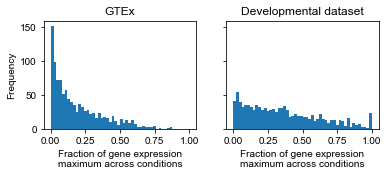

In [31]:
# for conditions with at least 1 TPM gene level expression
# what's the fraction of each isoform
# take the max
# remove the most expressed isoform
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(w=6, h=2)
most_expressed_isoform_per_gene = means.mean(axis=1).groupby(genes).idxmax()
raw_means = (2 ** means - 1)
f = raw_means / raw_means.groupby(genes).transform('sum')
f = f * (means.groupby(genes).transform('sum') >= 1).applymap(lambda x: 1 if x else np.nan)
f = f.loc[~f.index.isin(most_expressed_isoform_per_gene.values), :]
f = f.max(axis=1)
f.plot.hist(bins=50, range=(0, 1), ax=axs[1])
axs[0].set_xlabel('Fraction of gene expression\nmaximum across conditions')
axs[1].set_xlabel('Fraction of gene expression\nmaximum across conditions')
axs[0].set_ylabel('Alternative isoforms')
axs[1].set_ylabel('')
axs[1].set_title('Developmental dataset')



most_expressed_isoform_per_gene = mean_gtex.mean(axis=1).groupby(genes_gtex).idxmax()
raw_means = (2 ** mean_gtex - 1)
f = raw_means / raw_means.groupby(genes_gtex).transform('sum')
f = f * (mean_gtex.groupby(genes_gtex).transform('sum') >= 1).applymap(lambda x: 1 if x else np.nan)
f = f.loc[~f.index.isin(most_expressed_isoform_per_gene.values), :]
f = f.max(axis=1)
f.plot.hist(bins=50, range=(0, 1), ax=axs[0])
axs[0].set_title('GTEx')
fig.savefig('../figures/fraction-gene-expression_alternative-isoforms.pdf',
            bbox_inches='tight')
# take max across either

In [23]:
f.sort_values(ascending=False).head()

UID
HEY2|2/2|05C07 HEY2-202             1.0
SPDEF|2/3|06E06 SPDEF-201           1.0
noclone PAX5-209                    1.0
E2F6|2/2|01A04 E2F6-211_E2F6-212    1.0
noclone ZNF414-202                  1.0
dtype: float64

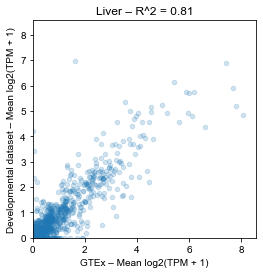

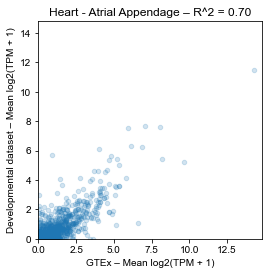

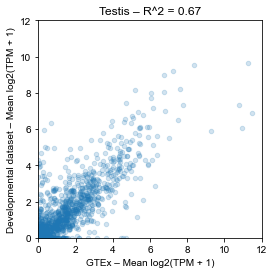

In [23]:
# split by cloned, novel, not cloned, sum genes
paired_tissues = [('liver adult', 'Liver'),
                  ('heart young adult', 'Heart - Atrial Appendage'),
                  ('testis adult', 'Testis')]
for cm_tissue, gtex_tissue in paired_tissues:
    paired = pd.merge(means.loc[:, [cm_tissue]],
            mean_gtex.loc[:, [gtex_tissue]],
            how='inner',
            left_index=True, right_index=True)
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(4, 4)
    paired.plot.scatter(x=gtex_tissue, 
                        y=cm_tissue, 
                        alpha=0.2,
                        ax=ax)
    upper = paired.max().max()
    ax.set_ylim(0, upper + 0.5)
    ax.set_xlim(0, upper + 0.5)
    ax.set_xlabel('GTEx – Mean log2(TPM + 1)')
    ax.set_ylabel('Developmental dataset – Mean log2(TPM + 1)')
    r = paired.corr().loc[cm_tissue, gtex_tissue]
    ax.set_title('{} – R^2 = {:.2f}'.format(gtex_tissue, r**2))
    plt.savefig('../figures/GTEx-vs-dev_{}.pdf'.format(gtex_tissue), bbox_inches='tight')


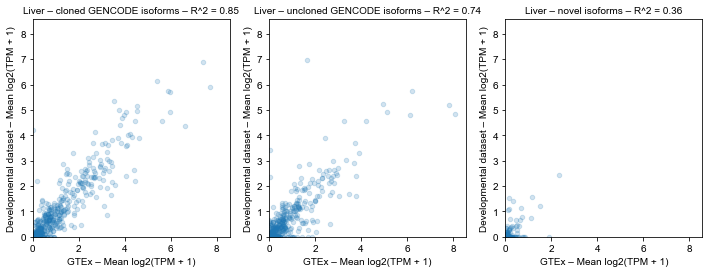

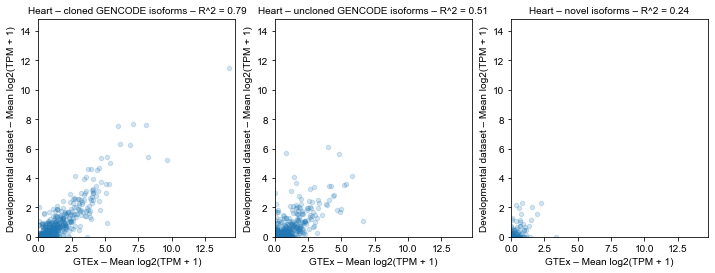

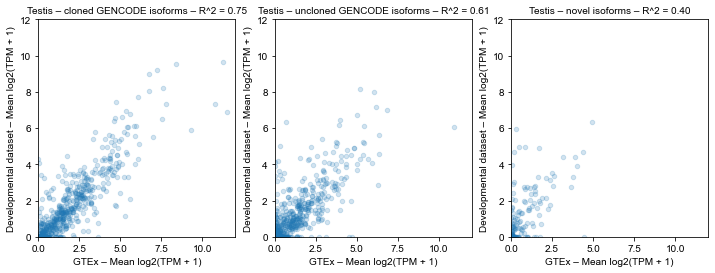

In [24]:
# split by cloned, novel, not cloned, sum genes
paired_tissues = [('liver adult', 'Liver'),
                  ('heart young adult', 'Heart - Atrial Appendage'),
                  ('testis adult', 'Testis')]
for cm_tissue, gtex_tissue in paired_tissues:
    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches(w=12, h=4)
    paired = pd.merge(means.loc[:, [cm_tissue]],
            mean_gtex.loc[:, [gtex_tissue]],
            how='inner',
            left_index=True, right_index=True)
    # cloned existing
    (paired.loc[~paired.index.str.startswith('noclone') & 
                ~paired.index.str.endswith('nomatch'), :]
    .plot.scatter(x=gtex_tissue, 
                        y=cm_tissue, 
                        alpha=0.2,
                        ax=axs[0]))
    r = paired.loc[~paired.index.str.startswith('noclone') & 
                   ~paired.index.str.endswith('nomatch'), :].corr().loc[cm_tissue, gtex_tissue]
    axs[0].set_title('{} – cloned GENCODE isoforms – R^2 = {:.2f}'.format(gtex_tissue.split()[0], r**2),
                    fontsize=10)
    # non-cloned
    (paired.loc[paired.index.str.startswith('noclone'), :]
    .plot.scatter(x=gtex_tissue, 
                        y=cm_tissue, 
                        alpha=0.2,
                        ax=axs[1]))
    r = paired.loc[paired.index.str.startswith('noclone'), :].corr().loc[cm_tissue, gtex_tissue]
    axs[1].set_title('{} – uncloned GENCODE isoforms – R^2 = {:.2f}'.format(gtex_tissue.split()[0], r**2),
                     fontsize=10)

    # novel
    (paired.loc[paired.index.str.endswith('nomatch'), :]
    .plot.scatter(x=gtex_tissue, 
                        y=cm_tissue, 
                        alpha=0.2,
                        ax=axs[2]))
    r = paired.loc[paired.index.str.endswith('nomatch'), :].corr().loc[cm_tissue, gtex_tissue]
    axs[2].set_title('{} – novel isoforms – R^2 = {:.2f}'.format(gtex_tissue.split()[0], r**2),
                    fontsize=10)

    upper = paired.max().max()
    for ax in axs:
        ax.set_ylim(0, upper + 0.5)
        ax.set_xlim(0, upper + 0.5)
        ax.set_xlabel('GTEx – Mean log2(TPM + 1)')
        ax.set_ylabel('Developmental dataset – Mean log2(TPM + 1)')
    plt.savefig('../figures/GTEx-vs-dev_{}_split.pdf'.format(gtex_tissue), bbox_inches='tight')


In [25]:
raw_means_gtex = 2 ** mean_gtex - 1.

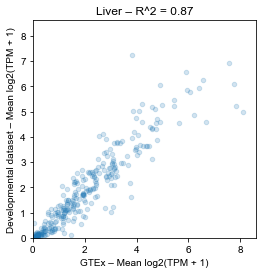

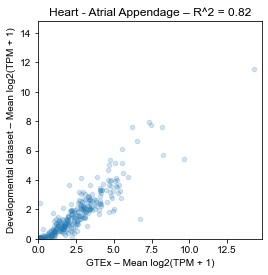

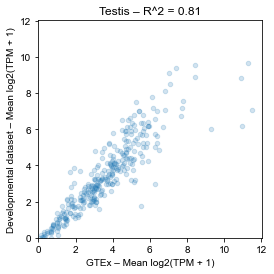

In [26]:
# log val 1, is 1
# log(a * b) = loga + logb
# log(a+b) = ???


# split by cloned, novel, not cloned, sum genes
paired_tissues = [('liver adult', 'Liver'),
                  ('heart young adult', 'Heart - Atrial Appendage'),
                  ('testis adult', 'Testis')]
for cm_tissue, gtex_tissue in paired_tissues:
    paired = pd.merge((raw_means.groupby(genes).sum() + 1).apply(np.log2).loc[:, [cm_tissue]],
                      (raw_means_gtex.groupby(genes).sum() + 1).apply(np.log2).loc[:, [gtex_tissue]],
            how='inner',
            left_index=True, right_index=True)
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(4, 4)
    paired.plot.scatter(x=gtex_tissue, 
                        y=cm_tissue, 
                        alpha=0.2,
                        ax=ax)
    upper = paired.max().max()
    ax.set_ylim(0, upper + 0.5)
    ax.set_xlim(0, upper + 0.5)
    ax.set_xlabel('GTEx – Mean log2(TPM + 1)')
    ax.set_ylabel('Developmental dataset – Mean log2(TPM + 1)')
    r = paired.corr().loc[cm_tissue, gtex_tissue]
    ax.set_title('{} – R^2 = {:.2f}'.format(gtex_tissue, r**2))
    plt.savefig('../figures/GTEx-vs-dev_{}_gene-level.pdf'.format(gtex_tissue), bbox_inches='tight')


In [ ]:
# per gene metric to quantify varaition in splicing across development
# use to compare families
# can make a scatter with gene expression level metric to control for that...